In [1]:
from typing import TypedDict
from langgraph.graph import START, StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    message: str

In [23]:
def greeting_node(state: AgentState)-> AgentState:
    """This node Greet user"""
    state['message']= "Hi," + state['name'] + "You are welcome"
    return state

def self_compliment_node(state:AgentState)->AgentState:
    "This function does the duty of complementing user"
    state['message'] = f"Hey, {state['name']}. You are doing well. Keep pushing"
    return state

In [25]:
graph = StateGraph(AgentState)

graph.add_node('compliment', self_compliment_node)
graph.add_node('greeting', greeting_node)
graph.set_entry_point('compliment')
app = graph.compile()



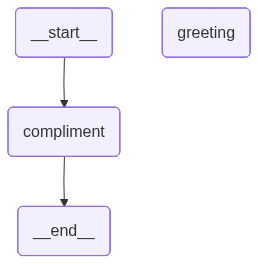

In [26]:

from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
input = {'name':"Temitayo", 'message':"You are doing well"}
app.invoke(input)

{'name': 'Temitayo',
 'message': 'Hey, Temitayo. You are doing well. Keep pushing'}